In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

seaice = pd.read_csv('seaice.csv')

# Let's check out what's in this dataset!
print(seaice.head())

   Year  Month  Day  Extent  Missing  \
0  1978     10   26  10.231      0.0   
1  1978     10   28  10.420      0.0   
2  1978     10   30  10.557      0.0   
3  1978     11    1  10.670      0.0   
4  1978     11    3  10.777      0.0   

                                         Source Data hemisphere  
0  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      north  
1  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      north  
2  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      north  
3  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      north  
4  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      north  


In [2]:
# 'Source Data' seems somewhat irrelevant here, at least at this step, so let's take that out.
seaice_ns = seaice.drop(seaice.columns[[5]], axis=1)
print(seaice_ns.head())
print(seaice_ns.tail())

   Year  Month  Day  Extent  Missing hemisphere
0  1978     10   26  10.231      0.0      north
1  1978     10   28  10.420      0.0      north
2  1978     10   30  10.557      0.0      north
3  1978     11    1  10.670      0.0      north
4  1978     11    3  10.777      0.0      north
       Year  Month  Day  Extent  Missing hemisphere
24903  2017      6    3  10.996      0.0      south
24904  2017      6    4  11.159      0.0      south
24905  2017      6    5  11.307      0.0      south
24906  2017      6    6  11.431      0.0      south
24907  2017      6    7  11.580      0.0      south


In [19]:
# 1978 and 2017 data are incomplete, so let's take those out as well.
seaice_7816 = seaice_ns[seaice_ns.Year != 2017]
seaice_7916 = seaice_7816[seaice_ns.Year != 1978]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


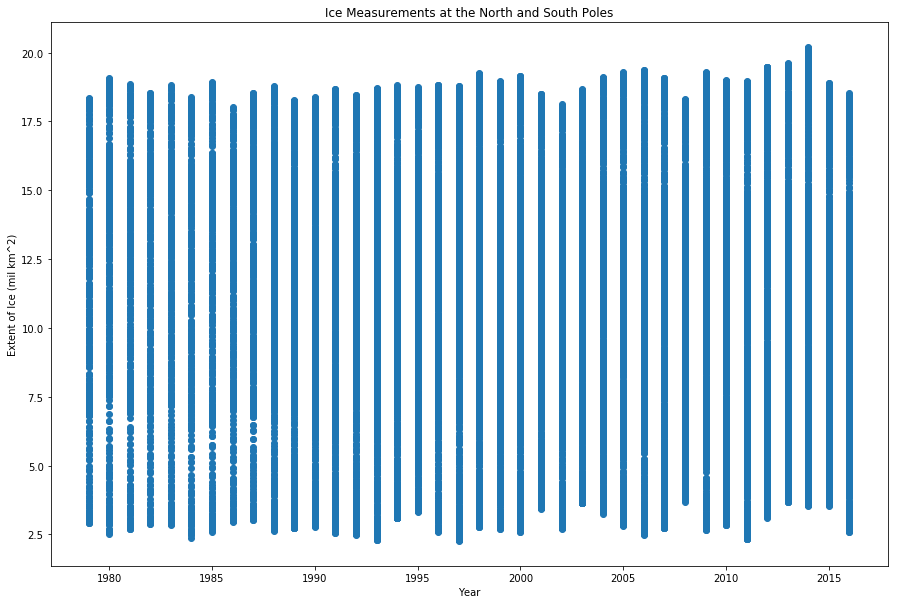

In [33]:
plt.figure(figsize=(15, 10))
plt.scatter(x = seaice_7916['Year'], y = seaice_7916['Extent'])
plt.xlabel('Year')
plt.ylabel('Extent of Ice (mil km^2)')
plt.title('Ice Measurements at the North and South Poles')

plt.show()

It's kind of difficult to see what might be going on here. There might be some cycle every few years at the bottom of the scale, but it's all within a small range. The top seems more random. This is taking the north and south pole data in together, so let's split that up.

In [20]:
n_seaice = seaice_7916.loc[lambda df: seaice_7916['hemisphere'] == 'north', :]
s_seaice = seaice_7916.loc[lambda df: seaice_7916['hemisphere'] == 'south', :]

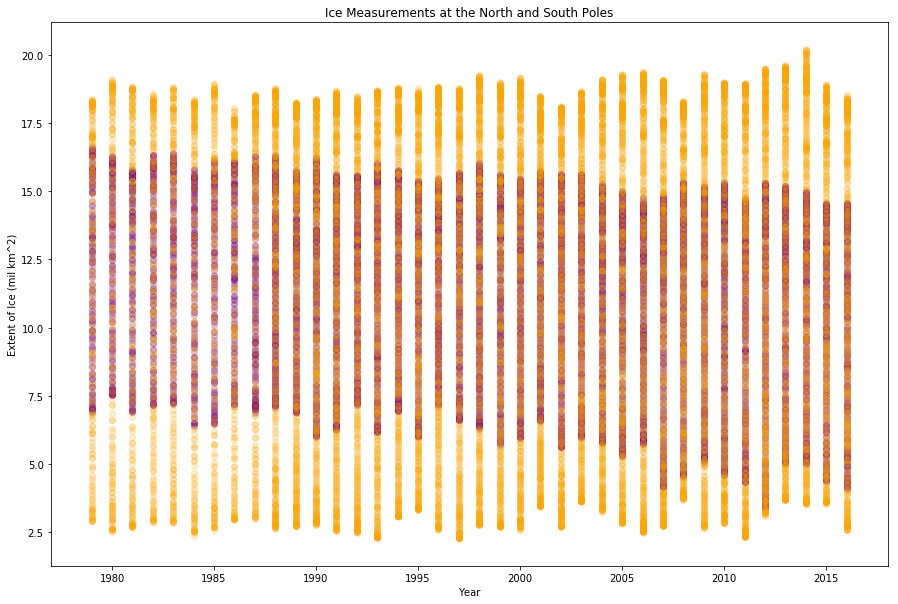

In [34]:
plt.figure(figsize=(15, 10))
plt.scatter(x = n_seaice['Year'], y = n_seaice['Extent'], color='purple', alpha=0.2)
plt.scatter(x = s_seaice['Year'], y = s_seaice['Extent'], color='orange', alpha=0.2)
plt.xlabel('Year')
plt.ylabel('Extent of Ice (mil km^2)')
plt.title('Ice Measurements at the North and South Poles')

plt.show()

That's a bit better! We can see that the south pole ice (blue) covers a larger area than the north pole ice (red) on an annual basis. The south pole appears relatively consistent in ice coverage over the sample time, whereas the north pole ice may be trending downwards, espeically at its lowest annual levels. 

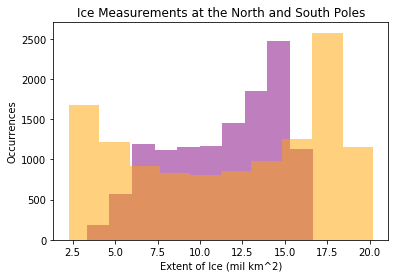

In [35]:
plt.hist(n_seaice['Extent'], normed=False, color='purple', alpha=.5)
plt.hist(s_seaice['Extent'], normed=False, color='orange', alpha=.5)
plt.xlabel('Extent of Ice (mil km^2)')
plt.ylabel('Occurrences')
plt.title('Ice Measurements at the North and South Poles')

plt.show()

This histogram could show that the transition between winter and summer uce levels is relatively short, compared to the time at the peaks and valleys of the ice level. There are more measurements where the ice level is around 5 milion square kilometers or below, or 17 and above, than there are for the levels in between, for the southern hemisphere. A similar statement could be made about the northern hemisphere, although not as extreme.

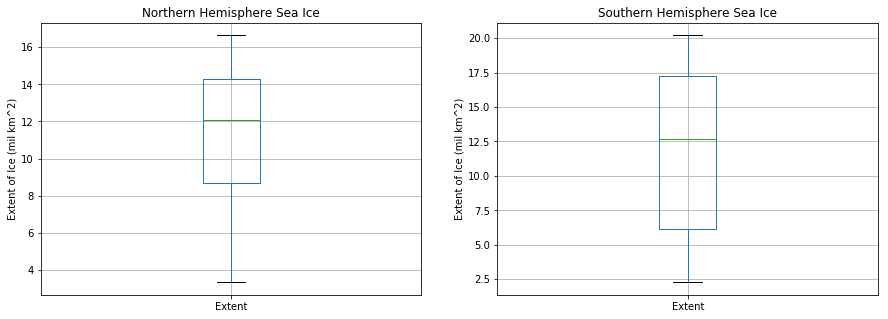

In [23]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
n_seaice.boxplot(column='Extent')
plt.ylabel('Extent of Ice (mil km^2)')
plt.title('Northern Hemisphere Sea Ice')

plt.subplot(1, 2, 2)
s_seaice.boxplot(column='Extent')
plt.ylabel('Extent of Ice (mil km^2)')
plt.title('Southern Hemisphere Sea Ice')

plt.show()

Indeed, we can see here that southern hemisphere ice ranges from under 2.5 million to over 20 million square kilometers in this sample, whereas northern hemisphere ice ranges from around 3 million to around 17 million square kilometers. Interestingly, the median ice area is within about a half-million square kilometers. Southern hemisphere ice has greater variability from year to year. 

In [24]:
# Let's take a look at the mean ice area for each year for the northern and southern hemispheres. 

n_year = n_seaice.groupby('Year').mean()
s_year = s_seaice.groupby('Year').mean()

print(n_year.head())
print(s_year.head())

         Month        Day     Extent  Missing
Year                                         
1979  6.527473  15.681319  12.319560      0.0
1980  6.497268  15.759563  12.334148      0.0
1981  6.524590  15.759563  12.135486      0.0
1982  6.527473  15.681319  12.439445      0.0
1983  6.524590  15.759563  12.335896      0.0
         Month        Day     Extent  Missing
Year                                         
1979  6.527473  15.681319  11.719137      0.0
1980  6.497268  15.759563  11.236290      0.0
1981  6.524590  15.759563  11.416809      0.0
1982  6.527473  15.681319  11.658066      0.0
1983  6.524590  15.759563  11.369913      0.0


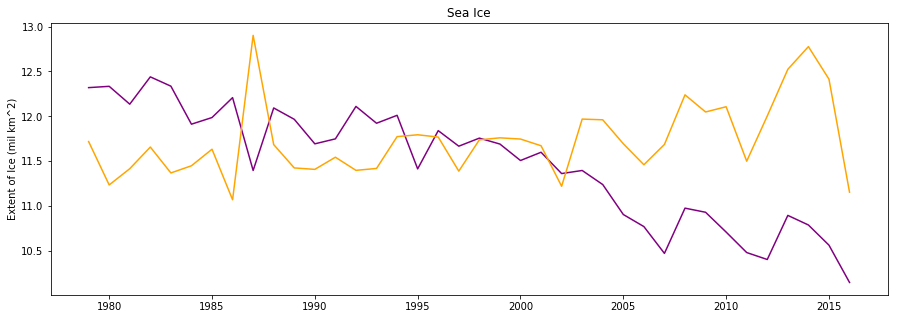

In [25]:
plt.figure(figsize=(15, 5))

plt.plot(n_year['Extent'], color='purple')
plt.ylabel('Extent of Ice (mil km^2)')
plt.title('Sea Ice')

plt.plot(s_year['Extent'], color='orange')
plt.ylabel('Extent of Ice (mil km^2)')

plt.show()

From this line graph, it appears that the mean amount of northern hemisphere sea ice from year to year is declining at a more consistent rate than the southern hemisphere ice. They have a similar range from beginning to end, but the overall line of the southern hemisphere ice is much flatter, whereas the northern hemisphere line has a clear downward slope. 